![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [2]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("dataset/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


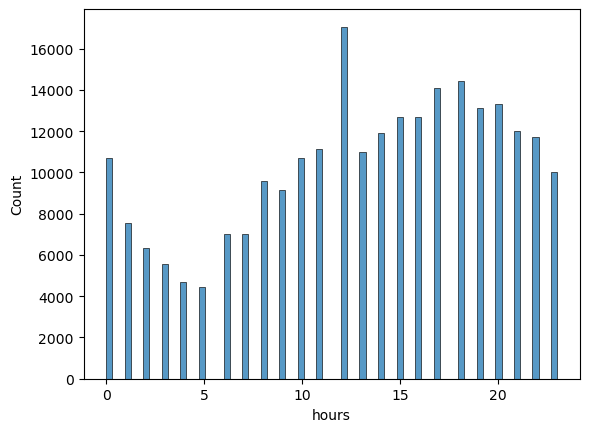

Peak crime hour is: 12 pm


In [3]:
# Start coding here
# Use as many cells as you need

#which hour has the highest frequency times?

#extract the hours from the times
crimes["hours"] = crimes["TIME OCC"].str[:2]
crimes["hours"] = crimes["hours"].astype("int")
#plot a histplot to get a visualisations of the crimes committed per hour.
sns.histplot(x = "hours", data = crimes)
plt.show()

#get the count of crimes per hour
peak_crime_hour = crimes["hours"].value_counts().index[0]
print(f"Peak crime hour is: {peak_crime_hour} pm")
peak_crime_hour = 12


Which area has the largest frequency of night crimes?


In [4]:
#subset the dataset for night crimes
#creat a column for where night crimes occur
crimes["night_crimes"] = ((crimes["hours"] >= 22) | (crimes["hours"] < 4))
night_crimes_df = crimes[crimes["night_crimes"] == True]
#night_crimes_df.groupby("AREA NAME", as_index = False).mean()
peak_night_crime_location = night_crimes_df["AREA NAME"].value_counts().index[0]
print(f"Area with peak night crime is {peak_night_crime_location} Area")

Area with peak night crime is Central Area


 0     62240
 30     5715
 35     5697
 32     5481
 31     5472
       ...  
 95       25
 94       23
 97       22
 98       17
-2         7
Name: Vict Age, Length: 101, dtype: int64

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
<18       4528
Name: age_categories, dtype: int64

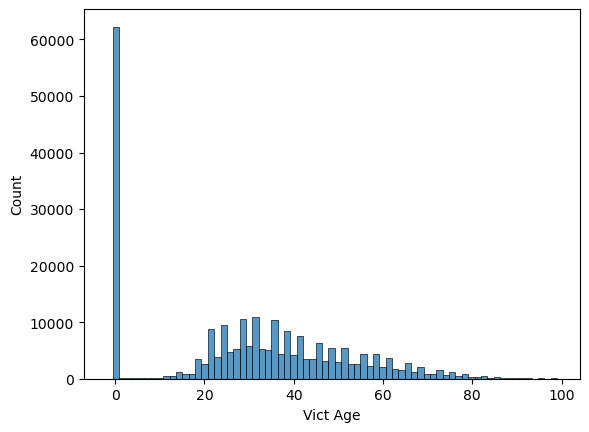

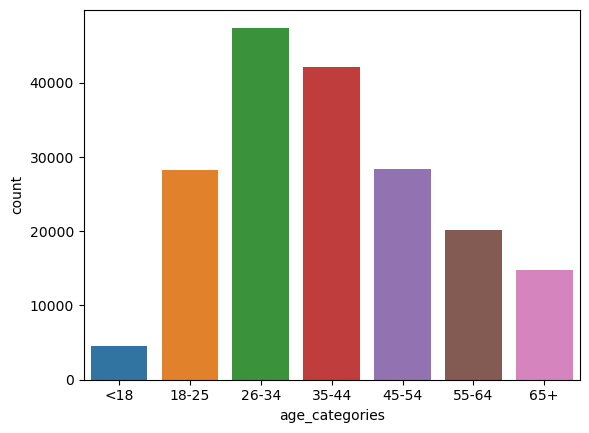

In [5]:
#visualize the victims' ages
display(crimes["Vict Age"].value_counts())
plt.figure()
sns.histplot(x = "Vict Age", data = crimes)


#Define the age bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["<18", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes["age_categories"] = pd.cut(crimes["Vict Age"], bins = age_bins, labels = age_labels)
#plot a countplot to visualize the crime counts of each age group
plt.figure()
sns.countplot(data = crimes, x= "age_categories")

victim_ages = crimes["age_categories"].value_counts()
victim_ages



From the countplot above we can see that the [26-34] age group are the most victims of crime in Los Angeles